Now that I have cleaned and prepared data, I answer some `inferential` questions and visualize them:

* What are the most sought-after skills for data-analyst positions?
* Which **companies** are hiring the most data-analysts?
* How do salary outcomes differ between remote-work & non-remote work?

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

encoded = pd.read_csv('data/encoded_df.csv')

encoded['salary_standardized']

0        45760.0
1       120000.0
2        53040.0
3        52000.0
4        91960.0
          ...   
2223     62400.0
2224     63440.0
2225     26000.0
2226     63440.0
2227    122720.0
Name: salary_standardized, Length: 2228, dtype: float64

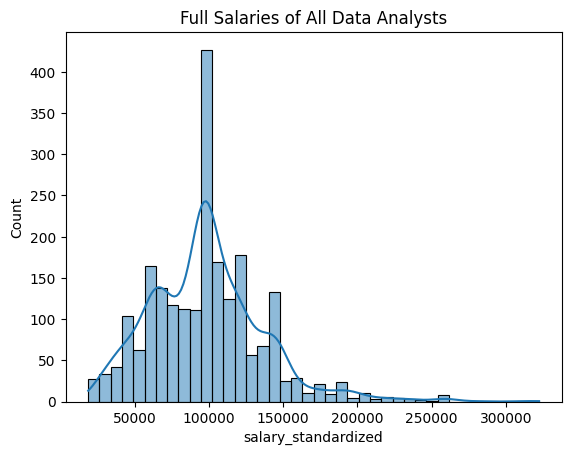

In [112]:
# All data analyst salaries

sns.histplot(data = encoded, x = 'salary_standardized', kde = True).set(title = 'Full Salaries of All Data Analysts')

plt.savefig("images/full_salary_hist.jpg")

In [103]:
# kstest for all data analysts

from scipy import stats

stats.kstest(
    encoded['salary_standardized'], cdf = stats.norm.cdf, 
args = (encoded["salary_standardized"].mean(), 
encoded["salary_standardized"].std()))

KstestResult(statistic=0.08846265470616899, pvalue=1.2767836585040726e-15, statistic_location=104004.6, statistic_sign=1)

Text(0.5, 1.0, 'Full Salaries of All Data Analysts')

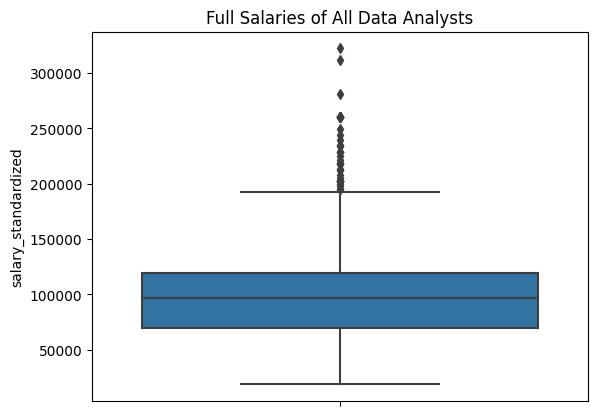

In [111]:
sns.boxplot( y = encoded['salary_standardized']).set_title('Full Salaries of All Data Analysts')

[Text(0.5, 1.0, 'Full Salaries of Remote Data Analysts')]

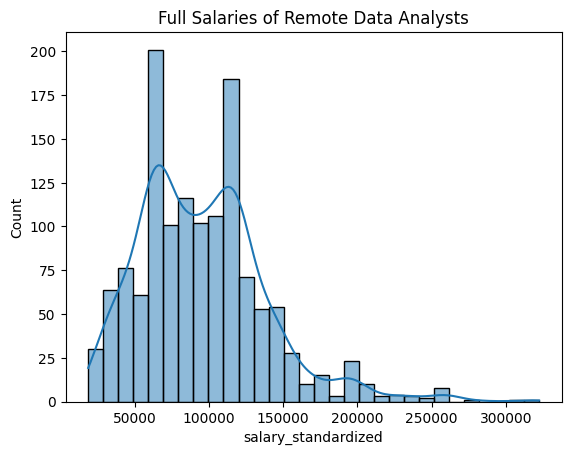

In [ ]:
# A new variable has to be set to find remote workers data

remote = encoded[encoded["work_from_home"] == True] 

sns.histplot(data = remote, x = 'salary_standardized', 
kde = True).set(title = 'Full Salaries of Remote Data Analysts')


In [ ]:
# kstest for remote data analysts

stats.kstest(
    encoded['work_from_home'], cdf = stats.norm.cdf, 
args = (encoded["work_from_home"].mean(), 
encoded["work_from_home"].std()))

KstestResult(statistic=0.3915017898314921, pvalue=3.686959327760675e-308, statistic_location=True, statistic_sign=-1)

[Text(0.5, 1.0, 'Full Salaries of Non-Remote Data Analysts')]

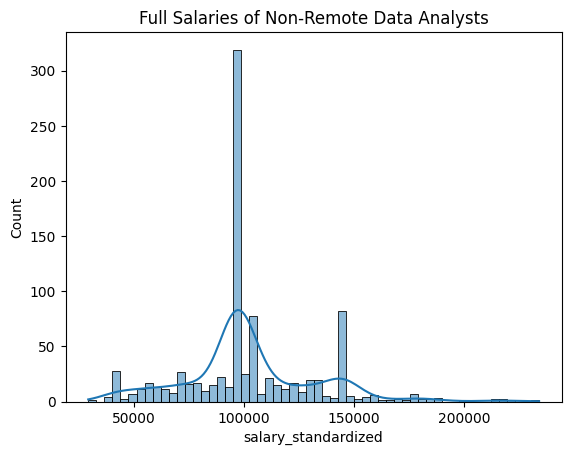

In [ ]:
# Set ["work_from_home"] == False selects all False values 
# In this case, False is non-remote

non_remote = encoded[encoded["work_from_home"] == False] 

sns.histplot(data = non_remote, x = 'salary_standardized', 
kde = True).set(title = 'Full Salaries of Non-Remote Data Analysts')

In [ ]:
# kstest for non_remote positions

stats.kstest(
    encoded['work_from_home'], cdf = stats.norm.cdf, 
args = (encoded["work_from_home"].mean(), 
encoded["work_from_home"].std()))

KstestResult(statistic=0.3915017898314921, pvalue=3.686959327760675e-308, statistic_location=True, statistic_sign=-1)